In [2]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [101]:
df = pd.read_csv('worldometer_data.csv')
day = pd.read_csv('day_wise.csv')
country = pd.read_csv('country_wise_latest.csv')
df = df.drop(columns=['NewCases', 'NewDeaths', 'NewRecovered'])

In [102]:
df.fillna(method='bfill')
df.dropna()

Country/Region      Continent    Population  TotalCases  \
0                    USA  North America  3.311981e+08     5032179   
1                 Brazil  South America  2.127107e+08     2917562   
2                  India           Asia  1.381345e+09     2025409   
3                 Russia         Europe  1.459409e+08      871894   
4           South Africa         Africa  5.938157e+07      538184   
..                   ...            ...           ...         ...   
153              Bahamas  North America  3.936160e+05         761   
160               Guyana  South America  7.869360e+05         538   
185               Monaco         Europe  3.927000e+04         125   
187  Antigua and Barbuda  North America  9.801000e+04          92   
189               Belize  North America  3.983120e+05          86   

     TotalDeaths  TotalRecovered  ActiveCases  Serious,Critical  \
0       162804.0       2576668.0    2292707.0           18296.0   
1        98644.0       2047660.0     771258.0            8318.0   
2        41638.0       1377384.0     606387.0            8944.0   
3        14606.0        676357.0     180931.0            2300.0   
4         9604.0        387316.0     141264.0             539.0   
..           ...             ...          ...               ...   
153         14.0            91.0        656.0               1.0   
160         22.0           189.0        327.0               2.0   
185          4.0           105.0         16.0               2.0   
187          3.0            76.0         13.0               1.0   
189          2.0            31.0         53.0               2.0   

     Tot Cases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop      WHO Region  
0             15194.0          492.0  63139605.0      190640.0        Americas  
1             13716.0          464.0  13206188.0       62085.0        Americas  
2              1466.0           30.0  22149351.0       16035.0  South-EastAsia  
3              5974.0          100.0  29716907.0      203623.0          Europe  
4              9063.0          162.0   3149807.0       53044.0          Africa  
..                ...            ...         ...           ...             ...  
153            1933.0           36.0      4814.0       12230.0        Americas  
160             684.0           28.0      5165.0        6563.0        Americas  
185            3183.0          102.0     38209.0      972982.0          Europe  
187             939.0           31.0      1500.0       15305.0        Americas  
189             216.0            5.0      3679.0        9236.0        Americas  

[103 rows x 13 columns]

## Calculando a Média

In [87]:
df.mean()

Population          3.041549e+07
TotalCases          9.171850e+04
TotalDeaths         3.792590e+03
TotalRecovered      5.887898e+04
ActiveCases         2.766433e+04
Serious,Critical    5.343934e+02
Tot Cases/1M pop    3.196024e+03
Deaths/1M pop       9.868118e+01
TotalTests          1.402405e+06
Tests/1M pop        8.395937e+04
dtype: float64

## Calculando a Variância

In [88]:
df.var()

Population          1.097594e+16
TotalCases          1.871312e+11
TotalDeaths         2.398529e+08
TotalRecovered      6.589407e+10
ActiveCases         3.049659e+10
Serious,Critical    4.192332e+06
Tot Cases/1M pop    2.695672e+07
Deaths/1M pop       3.060990e+04
TotalTests          3.083988e+13
Tests/1M pop        2.332663e+10
dtype: float64

## Calculando a Medi Ana

In [89]:
df.median()

Population          7041972.5
TotalCases             4491.0
TotalDeaths             113.0
TotalRecovered         2178.0
ActiveCases             899.0
Serious,Critical         27.5
Tot Cases/1M pop       1015.0
Deaths/1M pop            29.0
TotalTests           135702.0
Tests/1M pop          32585.0
dtype: float64

## Calculando o Desvio Padrão

In [90]:
df.std()

Population          1.047661e+08
TotalCases          4.325867e+05
TotalDeaths         1.548718e+04
TotalRecovered      2.566984e+05
ActiveCases         1.746327e+05
Serious,Critical    2.047519e+03
Tot Cases/1M pop    5.191986e+03
Deaths/1M pop       1.749569e+02
TotalTests          5.553367e+06
Tests/1M pop        1.527306e+05
dtype: float64

## Calculando medidas de dispersão de algumas colunas


In [91]:
df['TotalCases'].describe()

count    2.090000e+02
mean     9.171850e+04
std      4.325867e+05
min      1.000000e+01
25%      7.120000e+02
50%      4.491000e+03
75%      3.689600e+04
max      5.032179e+06
Name: TotalCases, dtype: float64

In [92]:
df['TotalDeaths'].mean()

3792.590425531915

In [93]:
df['TotalDeaths'].median()

113.0

In [94]:
df['TotalDeaths'].mode()

0    1.0
dtype: float64

In [95]:
df['TotalDeaths'].std()

15487.184877168194

## Boxplot de algumas colunas

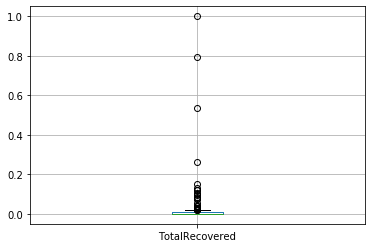

In [96]:
df['TotalRecovered'] = df['TotalRecovered']/max(df['TotalRecovered'])
df.boxplot(column='TotalRecovered')

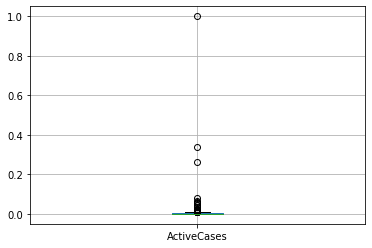

In [97]:
df['ActiveCases'] = df['ActiveCases']/max(df['ActiveCases'])
df.boxplot(column='ActiveCases')

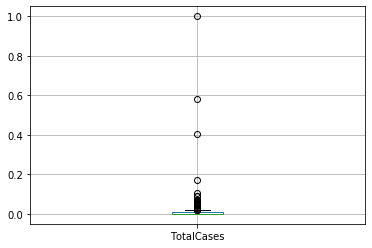

In [98]:
df['TotalCases'] = df['TotalCases']/max(df['TotalCases'])
df.boxplot(column='TotalCases')

## Gráfico dos casos de COVID-19

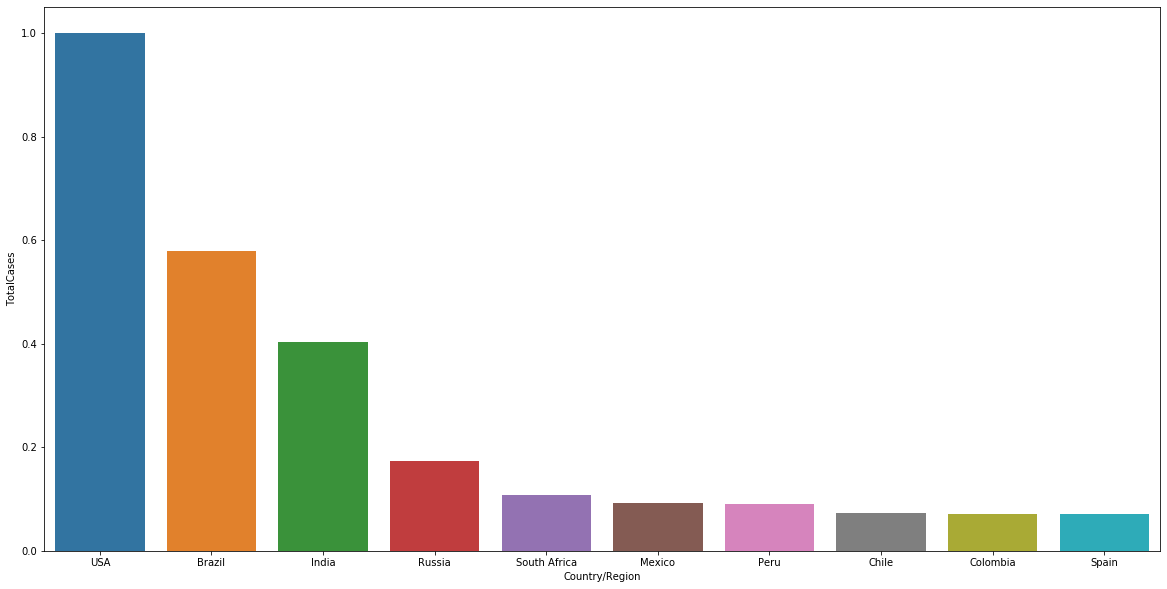

In [99]:
plt.figure(figsize=(20,10))
sns.barplot(data=df[:10], x="Country/Region", y="TotalCases")

## Matriz de correlação das instâncias

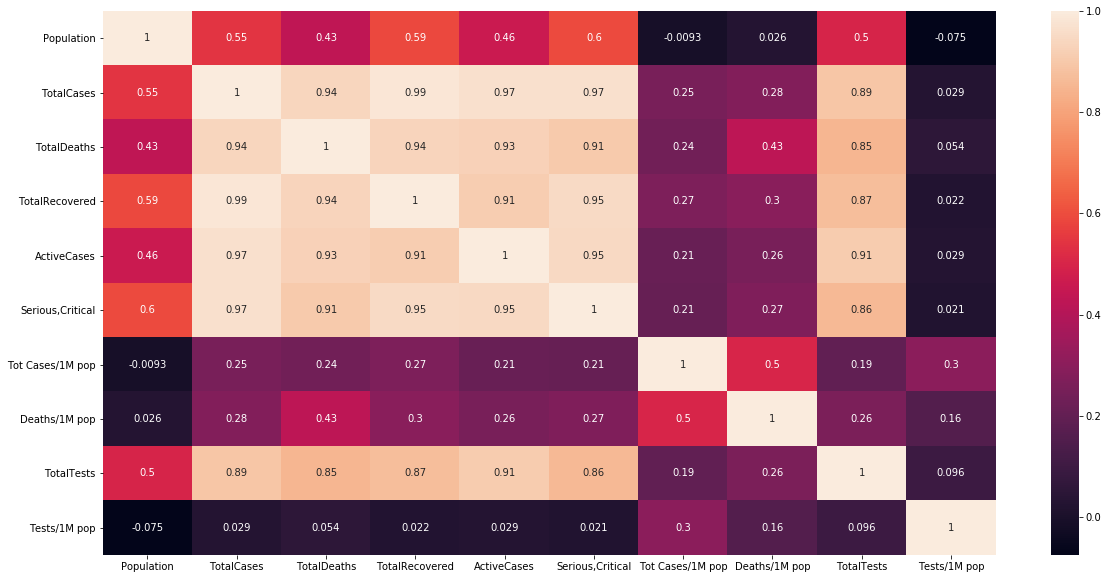

In [100]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

## Curva de crescimento dos novos casos do COVID-19

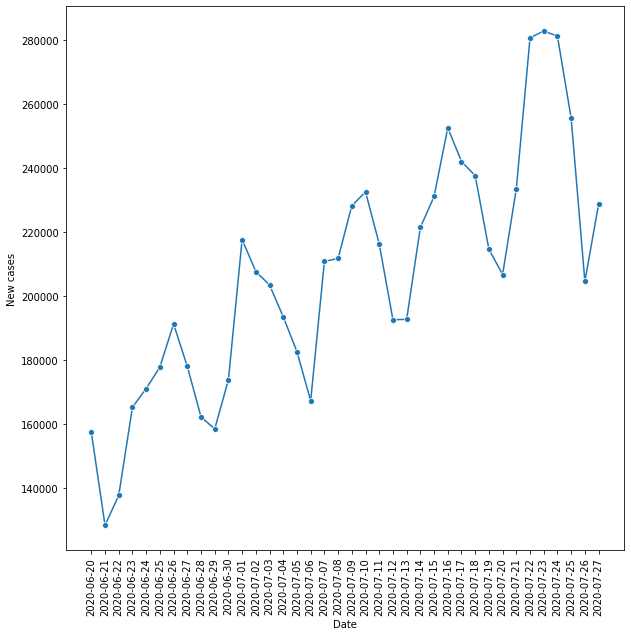

In [103]:
start = 150
limit = 200
plt.figure(figsize=(10,10))
g = sns.lineplot(data=day[start:limit], x="Date", y="New cases", marker="o")
g = g.set_xticklabels(labels=day["Date"][start:limit], rotation=90)

## Gráfico de dispersão

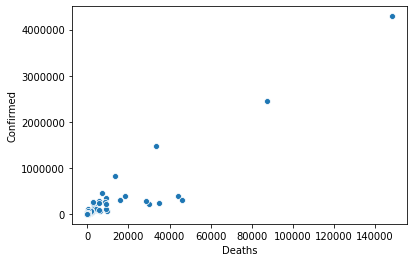

In [104]:
sns.scatterplot(data=country, x="Deaths", y="Confirmed")